# **Key Point Detection - 4**

## **Key Point Detection Inference and Board Wrapping**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/KeyPoint

/content/drive/MyDrive/KeyPoint


In [ ]:
!ls

BoardWrapping.ipynb  IrisEstimation.ipynb    models_1
data		     logs		     Test_Augmentation.ipynb
data_creation.ipynb  Model_detectCorners.h5  Trainning.ipynb


#### **Load Model**

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Conv2D, Reshape, Dropout
# from tensorflow.keras.applications import ResNet152V2

In [ ]:
# model = Sequential([
#     Input(shape=(250,250,3)), 
#     ResNet152V2(include_top=False, input_shape=(250,250,3)),
#     Conv2D(512, 3, padding='same', activation='relu'),
#     Conv2D(512, 3, padding='same', activation='relu'),
#     Conv2D(256, 3, 2, padding='same', activation='relu'),
#     Conv2D(256, 2, 2, activation='relu'),
#     Dropout(0.05),
#     Conv2D(8, 2, 2),
#     Reshape((8,))
# ])

In [ ]:
# model.summary()

In [ ]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0007)
# loss = tf.keras.losses.MeanSquaredError()

In [ ]:
#model.compile(optimizer, loss)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('Model_detectCorners.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 512)         9437696   
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 512)         2359808   
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 256)         1179904   
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 256)         262400    
                                                                 
 dropout (Dropout)           (None, 2, 2, 256)         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 1, 8)           8

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
test_img_path = r'/content/drive/MyDrive/KeyPoint/data/aug4/images/05ad7223827a29a8283f6c4b2490f52f_jpg_0.jpg'

img = cv2.imread(test_img_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized = cv2.resize(rgb_img, (250,250))
yhat = model.predict(np.expand_dims(resized/255,0))

1/1 [==============================] - 4s 4s/step


In [ ]:
coords = yhat[0]

### **Visualize Model Results**

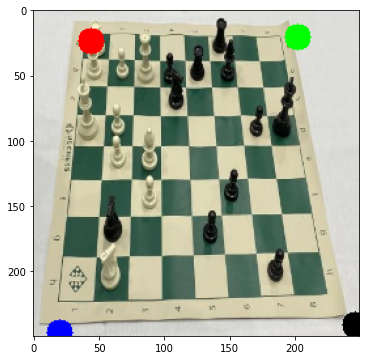

In [ ]:
plt.figure(figsize=(6,6))

tk = 5
cv2.circle(resized, tuple(np.multiply(coords[:2], [250,250]).astype(int)), tk, (255,0,0), -1)
cv2.circle(resized, tuple(np.multiply(coords[2:4], [250,250]).astype(int)), tk, (0,255,0), -1)
cv2.circle(resized, tuple(np.multiply(coords[4:6], [250,250]).astype(int)), tk, (0,0,255), -1)
cv2.circle(resized, tuple(np.multiply(coords[6:], [250,250]).astype(int)), tk, (0,0,0), -1)

plt.imshow(resized);

### **Image Wraping using Corner Points**

In [ ]:
test_img_path = r'/content/drive/MyDrive/KeyPoint/data/aug4/images/05ad7223827a29a8283f6c4b2490f52f_jpg_0.jpg'

img = cv2.imread(test_img_path)
h,w = img.shape[0],img.shape[1]
print(h,w)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized = cv2.resize(rgb_img, (250,250))

416 416


In [ ]:
yhat = model.predict(np.expand_dims(resized/255,0))
coords = yhat[0]

1/1 [==============================] - 1s 832ms/step


In [ ]:
coords

array([0.17604296, 0.09710409, 0.81116074, 0.08595289, 0.08377775,
       0.9881412 , 0.9842352 , 0.9670162 ], dtype=float32)

In [ ]:
# 'LU', 'RU' ,'LD' ,'RD'

In [ ]:
LU = np.multiply(coords[:2], scaler).astype(int)
RU = np.multiply(coords[2:4], scaler).astype(int)
LD = np.multiply(coords[4:6], scaler).astype(int)
RD = np.multiply(coords[6:], scaler).astype(int)

In [ ]:
print(LU)

[73 40]


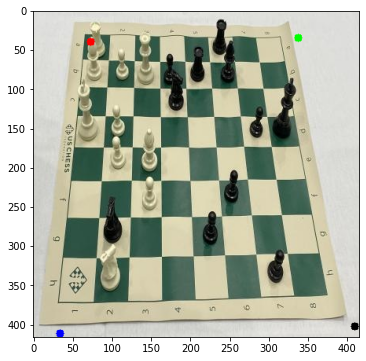

In [ ]:
plt.figure(figsize=(6,6))

tk = 5
scaler = [w,h]
cv2.circle(rgb_img, tuple(LU), tk, (255,0,0), -1)
cv2.circle(rgb_img, tuple(RU), tk, (0,255,0), -1)
cv2.circle(rgb_img, tuple(LD), tk, (0,0,255), -1)
cv2.circle(rgb_img, tuple(RD), tk, (0,0,0), -1)

plt.imshow(rgb_img);

In [ ]:
pts1 = np.float32([LU, RU,LD,RD])
pts2 = np.float32([[0,0],[w,0],[0,h],[w,h]])

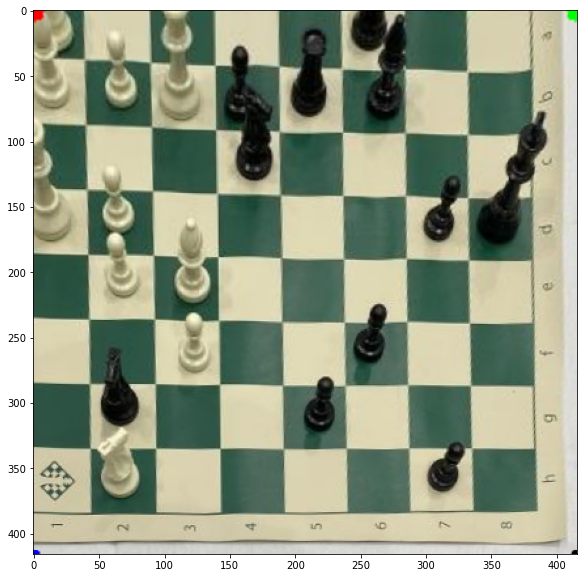

In [ ]:
plt.figure(figsize=(10,10))
matrix = cv2.getPerspectiveTransform(pts1,pts2)
output = cv2.warpPerspective(rgb_img,matrix,(w,h))

plt.imshow(output);